# Professor Leons - Derivates Intros (FRE 6073) 
# Homework #1
---

#### Problem 1 
#### **a**

#### Answers:
#### No-Arbitrage Bounds for \(C(45)-C(50)\)

Let \(C(K)\) denote the **today** price of a European call with strike \(K\) and common maturity \(T\).

#### Setup (Vertical Call Spread View)

The price difference equals the price of a vertical call spread (long \(K{=}45\), short \(K{=}50\)):

$$
\text{Spread price} \;=\; C(45)-C(50).
$$

Its payoff at expiry \(T\) is

$$
\Pi_T \;=\; (S_T-45)^+ - (S_T-50)^+ \;=\; \min\!\big\{(S_T-45)^+,\, 5\big\}.
$$

Therefore, for all terminal prices \(S_T\),

$$
0 \;\le\; \Pi_T \;\le\; 5.
$$

A convenient piecewise form:

$$
\Pi_T \;=\;
\begin{cases}
0, & S_T \le 45,\\[4pt]
S_T-45, & 45 < S_T \le 50,\\[4pt]
5, & S_T > 50.
\end{cases}
$$

#### Upper Bound via Super-Hedging (Dominance)

Because the spread’s payoff is pointwise bounded by \(5\), its price cannot exceed the present value of \(5\) under no-arbitrage:

$$
C(45)-C(50) \;\le\; 5\,e^{-rT}.
$$

**Arbitrage construction (intuition):** If instead \(C(45)-C(50) > 5e^{-rT}\), then short the spread **now** (receive \(C(45)-C(50)\)), buy a zero-coupon bond paying \(5\) at \(T\) (cost \(5e^{-rT}\)). At expiry, the short spread pays at most \(5\), exactly offset by the bond, locking the riskless profit
$$
\big(C(45)-C(50)\big) - 5e^{-rT} \;>\; 0.
$$

#### Lower Bound via Monotonicity

Call prices are nonincreasing in the strike for the same expiry/underlying (\(K_1<K_2 \Rightarrow C(K_1)\ge C(K_2)\)). Hence

$$
C(45)-C(50) \;\ge\; 0.
$$

**Arbitrage intuition:** If \(C(45)-C(50) < 0\), buy the spread (you receive cash today) while \(\Pi_T \ge 0\) for all \(S_T\), yielding a riskless gain.

#### Combined No-Arbitrage Inequality

Putting both sides together,

$$
0 \;\le\; C(45)-C(50) \;\le\; 5\,e^{-rT}.
$$

If \(r>0\), then \(5e^{-rT} < 5\), so

$$
C(45)-C(50) \;<\; 5.
$$



---
---
#### **b**

#### Behavior of \(f(K)=C(K)-C(K{+}1)\) as \(K\) increases

Let \(C(K)\) be the price today of a European call with strike \(K\) and common maturity \(T\). Define

$$
f(K) \;=\; C(K) - C(K{+}1),
$$

i.e., the price of a **\$1-wide call spread** (long \(K\), short \(K{+}1\)).

---

#### Key facts (no-arbitrage, risk-neutral measure \(\mathbb{Q}\))

**Upper bound (width \(\times\) PV of \$1):**

$$
0 \;\le\; f(K) \;\le\; e^{-rT}.
$$

**Tail-probability representation (mean-value form):** using \(-\frac{\partial C}{\partial K}=e^{-rT}\,\mathbb{Q}(S_T>K)\),

$$
f(K) \;=\; C(K)-C(K{+}1) \;=\; e^{-rT}\!\int_{K}^{K+1}\!\mathbb{Q}(S_T>x)\,dx,
$$

which implies the bounds

$$
e^{-rT}\,\mathbb{Q}(S_T>K{+}1)\;\le\; f(K) \;\le\; e^{-rT}\,\mathbb{Q}(S_T>K).
$$

---

#### Monotonicity and limit

Since \(\mathbb{Q}(S_T>K)\) is **decreasing** in \(K\),

$$
f(K)\ \text{is strictly decreasing in }K,
$$

and

$$
\lim_{K\to\infty} f(K) \;=\; 0.
$$

---

#### Summary

- \(f(K)\) is the price of earning **at most \$1** at expiry; as you shift the strikes **to the right** (larger \(K\)), the event “\(S_T\) ends above those strikes” becomes **less likely**, so the spread is **worth less**.
- For very large \(K\), both calls are far OTM with vanishing probability of finishing ITM, hence

$$
f(K) \;\to\; 0 \quad \text{as } K\to\infty.
$$

$$
0 \;<\; f(K) \;\le\; e^{-rT}, \quad f(K)\ \text{decreases in }K, \quad \lim_{K\to\infty} f(K)=0.
$$


---
---


#### **c**

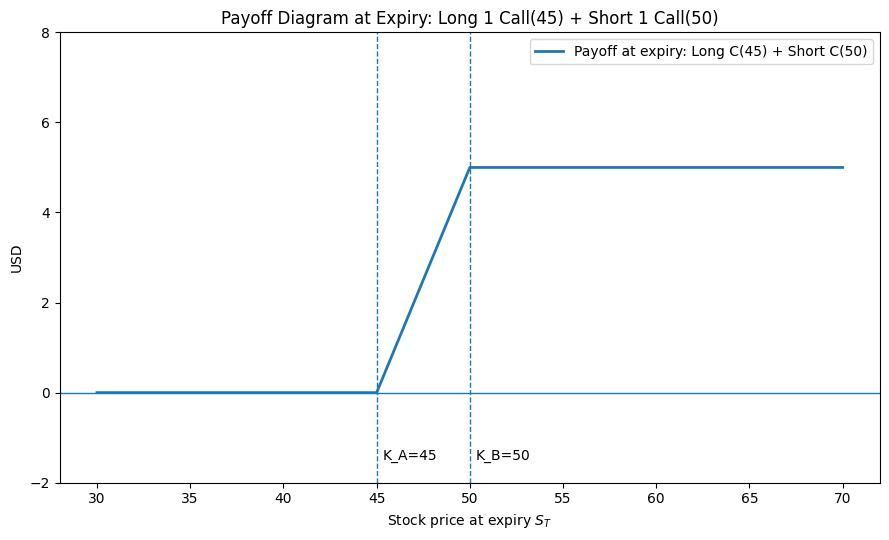

Payoff sanity check:
S_T= 40.0 -> payoff=  0.0
S_T= 45.0 -> payoff=  0.0
S_T= 50.0 -> payoff=  5.0
S_T= 55.0 -> payoff=  5.0
S_T= 60.0 -> payoff=  5.0


In [19]:
# Payoff diagram for Long 1 Call(K=45) + Short 1 Call(K=50)
import numpy as np
import matplotlib.pyplot as plt


K_A = 45.0   # Strike for Call A (long)
K_B = 50.0   # Strike for Call B (short)
T_years = 0.25  # 3 months ≈ 0.25 years (only used if plotting Profit)
r = 0.0         # risk-free rate for discounting/compounding to expiry (Profit)
# Option premiums (today's prices); set to None if unknown/ignore Profit
C_A = None   # price you pay for Call A (long)
C_B = None   # price you receive for Call B (short)

# Toggle whether to plot Profit (requires C_A and C_B)
PLOT_PROFIT = False  # change to True after filling C_A and C_B

# Stock price range at expiry
S_min, S_max, n_points = 30.0, 70.0, 801

# -----------------------------
# Core computations
# -----------------------------
S_T = np.linspace(S_min, S_max, n_points)

# Payoffs at expiry
payoff_long_A  = np.maximum(S_T - K_A, 0.0)
payoff_short_B = -np.maximum(S_T - K_B, 0.0)
payoff_net     = payoff_long_A + payoff_short_B  # this is the desired payoff

# Optional Profit curve (include premiums & carry to expiry)
profit_net = None
if PLOT_PROFIT:
    if C_A is None or C_B is None:
        raise ValueError("To plot Profit, please specify C_A and C_B.")
    # Assume you pay C_A now (cash outflow) and receive C_B now (inflow).
    # If you invest/borrow at rate r continuously to expiry:
    net_premium_today = -C_A + C_B
    net_premium_to_expiry = net_premium_today * np.exp(r * T_years)
    profit_net = payoff_net + net_premium_to_expiry

# -----------------------------
# Plotting
# -----------------------------
plt.figure(figsize=(9, 5.5))

# Plot payoff
plt.plot(S_T, payoff_net, linewidth=2, label='Payoff at expiry: Long C(45) + Short C(50)')

# Reference lines
plt.axhline(0, linewidth=1)
plt.axvline(K_A, linestyle='--', linewidth=1); plt.text(K_A + 0.3, -1.5, 'K_A=45')
plt.axvline(K_B, linestyle='--', linewidth=1); plt.text(K_B + 0.3, -1.5, 'K_B=50')

# Optional Profit
if profit_net is not None:
    plt.plot(S_T, profit_net, linewidth=2, linestyle='--', label='Profit at expiry (incl. premiums)')

plt.title('Payoff Diagram at Expiry: Long 1 Call(45) + Short 1 Call(50)')
plt.xlabel(r'Stock price at expiry $S_T$')
plt.ylabel('USD')
plt.ylim(-2, 8)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# -----------------------------
# Quick sanity check (print extremes)
# -----------------------------
print("Payoff sanity check:")
for s in [40, 45, 50, 55, 60]:
    p = max(s - K_A, 0.0) - max(s - K_B, 0.0)
    print(f"S_T={s:>5.1f} -> payoff={p:>5.1f}")


---
---
**d**

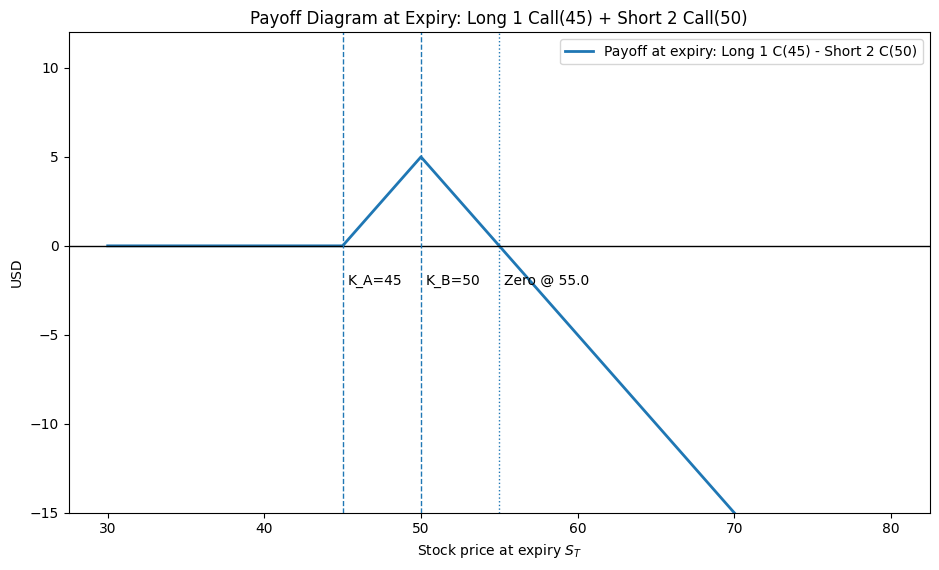

Sanity check (selected points):
S_T= 40.0 -> payoff=  0.00
S_T= 45.0 -> payoff=  0.00
S_T= 50.0 -> payoff=  5.00
S_T= 55.0 -> payoff=  0.00
S_T= 60.0 -> payoff= -5.00


In [20]:
# payoff diagram for Long 1 Call(K=45) + Short 2 Call(K=50)
K_A = 45.0     # strike for Call A (long 1x)
K_B = 50.0     # strike for Call B (short 2x)
ratio_short = 2.0  # number of short calls at K_B
T_years = 0.25     # ~3 months, used only if plotting Profit
r = 0.0            # risk-free rate for carrying premiums to expiry (Profit)

# Option premiums today (optional, for Profit). If unknown, leave as None.
C_A = None        # price paid for Call A (long)
C_B = None        # price received for each Call B (short)
PLOT_PROFIT = False  # set True only after filling C_A and C_B

# Stock price grid at expiry
S_min, S_max, n_points = 30.0, 80.0, 1001
S_T = np.linspace(S_min, S_max, n_points)

# -----------------------------
# Core payoff computations
# -----------------------------
payoff_long_A   = np.maximum(S_T - K_A, 0.0)
payoff_short_Bs = -ratio_short * np.maximum(S_T - K_B, 0.0)
payoff_net      = payoff_long_A + payoff_short_Bs

# Zero-crossing (for S_T > K_B region): solve (1 - n) S + n*K_B - K_A = 0
# Only meaningful if ratio_short != 1 and we are in S_T > K_B region
S_zero = None
if ratio_short != 1:
    S_zero = (ratio_short * K_B - K_A) / (ratio_short - 1.0)

# Optional Profit (include premiums carried to expiry)
profit_net = None
if PLOT_PROFIT:
    if C_A is None or C_B is None:
        raise ValueError("To plot Profit, specify C_A (paid) and C_B (received per short call).")
    net_premium_today = -C_A + ratio_short * C_B   # inflow positive, outflow negative
    net_premium_to_expiry = net_premium_today * np.exp(r * T_years)
    profit_net = payoff_net + net_premium_to_expiry

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(9.5, 5.8))

plt.plot(S_T, payoff_net, linewidth=2, label='Payoff at expiry: Long 1 C(45) - Short 2 C(50)')

# Reference lines and markers
plt.axhline(0, linewidth=1, color='black')
plt.axvline(K_A, linestyle='--', linewidth=1); plt.text(K_A + 0.3, -2.2, 'K_A=45')
plt.axvline(K_B, linestyle='--', linewidth=1); plt.text(K_B + 0.3, -2.2, 'K_B=50')

# Mark zero-crossing (if in plotting range)
if S_zero is not None and S_min <= S_zero <= S_max:
    plt.axvline(S_zero, linestyle=':', linewidth=1)
    plt.text(S_zero + 0.3, -2.2, f'Zero @ {S_zero:.1f}')

# Optional profit curve
if profit_net is not None:
    plt.plot(S_T, profit_net, linewidth=2, linestyle='--', label='Profit at expiry (incl. premiums)')

plt.title('Payoff Diagram at Expiry: Long 1 Call(45) + Short 2 Call(50)')
plt.xlabel(r'Stock price at expiry $S_T$')
plt.ylabel('USD')
plt.ylim(-15, 12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# -----------------------------
# Quick sanity check
# -----------------------------
print("Sanity check (selected points):")
for s in [40, 45, 50, 55, 60]:
    p = max(s - K_A, 0.0) - 2.0 * max(s - K_B, 0.0)
    print(f"S_T={s:>5.1f} -> payoff={p:>6.2f}")


---
---
**e**

**Answer:** **Call A (K = 45)** is more sensitive to a change in anticipated volatility than **Call B (K = 50)**, because with the same maturity the **vega** of a call is largest **near-the-money** and decreases as the strike moves further out-of-the-money; \(K=45\) is closer to the money than \(K=50\) when \(S_0=40\).


#### Vega (sensitivity to volatility)

For a European call under Black–Scholes (risk-free rate \(r\), dividend yield \(q\)):

$$
\text{Vega} \;=\; \frac{\partial C}{\partial \sigma}
\;=\; S_0 e^{-qT}\,\sqrt{T}\,\varphi(d_1),
$$

where \(\varphi(\cdot)\) is the standard normal pdf and

$$
d_1 \;=\; \frac{\ln\!\big(\tfrac{S_0}{K}\big) + (r-q+\tfrac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}.
$$

Since \(S_0, T\) are common to both calls, the **only difference** in vega comes from \(\varphi(d_1)\), which is maximized when \(d_1 \approx 0\) (i.e., **near-the-money**).


#### “ATM maximizes vega” property

Because \(\varphi(x)\) peaks at \(x=0\) and decays as \(|x|\) grows,

$$
\text{Vega} \propto \varphi(d_1) \quad \text{is largest when } d_1 \approx 0
\ \Leftrightarrow\ K \approx F_{0,T}:=S_0 e^{(r-q)T}.
$$

Equivalently, **the closer \(K\)** is to the forward price \(F_{0,T}\) (or to \(S_0\) when \(r\approx q\)), the **larger the vega**.


#### Apply to the two strikes

With \(S_0=40\) and the same \(T\) for both options:

- \(K=45\) (Call A) is **closer to the money** than \(K=50\) (Call B),
- thus \(|d_1|\) is **smaller** for \(K=45\), hence \(\varphi(d_1)\) is **larger**,
- therefore
  $$
  \text{Vega}_{K=45} \;>\; \text{Vega}_{K=50}.
  $$


#### **Conclusion:**

- Vega is **positive** for calls and puts:
  $$
  \frac{\partial C}{\partial \sigma} > 0, \qquad \frac{\partial P}{\partial \sigma} > 0.
  $$
- For a given \(T\), vega **decays** as options move deep ITM/OTM:
  $$
  \varphi(d_1)\downarrow \text{ as } |d_1|\uparrow.
  $$
- Longer \(T\) generally increases vega (here both calls share the same \(T\)).

- Therefore, **Call A (K=45)** is more “volatility-sensitive” than **Call B (K=50)**.

---
---

#### Problem 2 
#### **a**

#### Given
$$
dX \;=\; a\,X^{2}\,dW, \qquad X(0)=1,
$$
hence the instantaneous return satisfies
$$
\frac{dX}{X} \;=\; a\,X\,dW.
$$


#### Conditional expectation (given $\mathcal{F}_t$)
Since $X(t)$ is $\mathcal{F}_t$-adapted and $\mathbb{E}_t[dW]=0$,
$$
\mathbb{E}_t\!\left[\frac{dX}{X}\right]
\;=\; \mathbb{E}_t\!\big[a\,X(t)\,dW\big]
\;=\; a\,X(t)\,\mathbb{E}_t[dW]
\;=\; 0.
$$

#### Conditional second moment
Using Itô isometry with $(dW)^2 = dt$ and $dW\,dt=0$,
$$
\mathbb{E}_t\!\left[\left(\frac{dX}{X}\right)^2\right]
\;=\;\mathbb{E}_t\!\big[a^2 X(t)^2 (dW)^2\big]
\;=\; a^2 X(t)^2\,\mathbb{E}_t[(dW)^2]
\;=\; a^2 X(t)^2\, dt.
$$

#### Conditional variance
Because $\mathbb{E}_t[dX/X]=0$,
$$
\mathrm{Var}_t\!\left(\frac{dX}{X}\right)
\;=\; \mathbb{E}_t\!\left[\left(\frac{dX}{X}\right)^2\right]
-\Big(\mathbb{E}_t\!\left[\tfrac{dX}{X}\right]\Big)^2
\;=\; a^2 X(t)^2\, dt.
$$


#### Results (conditional, instantaneous)
$$
\boxed{\;
\mathbb{E}_t\!\left[\frac{dX}{X}\right]=0,
\qquad
\mathrm{Var}_t\!\left(\frac{dX}{X}\right)=a^2 X(t)^2\, dt
\;}
$$


#### Unconditional forms (optional)
By iterated expectation,
$$
\mathbb{E}\!\left[\frac{dX}{X}\right]
\;=\; \mathbb{E}\!\left[\mathbb{E}_t\!\left(\tfrac{dX}{X}\right)\right]
\;=\; 0,
$$
and the law of total variance gives
$$
\mathrm{Var}\!\left(\frac{dX}{X}\right)
\;=\; \mathbb{E}\!\left[\mathrm{Var}_t\!\left(\tfrac{dX}{X}\right)\right]
+\mathrm{Var}\!\left(\mathbb{E}_t\!\left(\tfrac{dX}{X}\right)\right)
\;=\; \mathbb{E}\!\left[a^2 X(t)^2\, dt\right]
\;=\; a^2\,\mathbb{E}\!\left[X(t)^2\right]\, dt.
$$

*(In applications, the instantaneous variability is typically reported via the conditional variance $a^2 X(t)^2\,dt$ )*

---
---
**b**

#### Answer:

Given the SDE
$$
dX \;=\; a\,X^{2}\,dW \quad\Rightarrow\quad \frac{dX}{X} \;=\; a\,X\,dW,
$$
the **instantaneous return** is $dX/X$.


#### Conditional mean and variance of the instantaneous return

Using $\mathbb{E}_t[dW]=0$ and $\mathrm{Var}_t(dW)=dt$,
$$
\mathbb{E}_t\!\left[\frac{dX}{X}\right]
\;=\; a\,X(t)\,\mathbb{E}_t[dW]
\;=\; 0,
$$
$$
\mathrm{Var}_t\!\left(\frac{dX}{X}\right)
\;=\; a^2 X(t)^2\,\mathrm{Var}_t(dW)
\;=\; a^2 X(t)^2\,dt.
$$

Hence the **instantaneous standard deviation** of return is
$$
\sqrt{\mathrm{Var}_t\!\left(\tfrac{dX}{X}\right)} \;=\; a\,X(t)\,\sqrt{dt},
$$
which **increases linearly** with the current price level $X(t)$.

#### Small-$\Delta t$ distributional view

Over a short interval $\Delta t$,
$$
\frac{\Delta X}{X(t)} \;\approx\; a\,X(t)\,\Delta W
\;\sim\; \mathcal N\!\big(0,\; a^2 X(t)^2\,\Delta t\big).
$$
As $X(t)$ grows, the variance $a^2 X(t)^2\,\Delta t$ grows **quadratically** in $X(t)$, so the return distribution becomes **wider** (more volatile).


#### Intuition via the diffusion coefficient

The **return SDE** can be read as
$$
\frac{dX}{X} \;=\; \underbrace{0}_{\text{drift}} \;+\; \underbrace{a\,X(t)}_{\text{local vol}}\, dW.
$$
Higher $X(t)$ $\Rightarrow$ larger local volatility $a\,X(t)$ $\Rightarrow$ larger instantaneous return fluctuations.

(Contrast with geometric Brownian motion $dX/X=\sigma\,dW$, where return volatility $\sigma$ is **constant**, independent of $X$.)

#### Equivalent statement in price units (not returns)

For the **price increment**, the conditional variance is
$$
\mathrm{Var}_t(dX)
\;=\; \mathrm{Var}_t\!\big(a\,X(t)^2\,dW\big)
\;=\; a^2 X(t)^4\,dt,
$$
which also rises rapidly with $X(t)$. Dividing by $X(t)^2$ recovers the return variance $a^2 X(t)^2 dt$.

#### Conclusion

Because the diffusion coefficient of the **return** process is $a\,X(t)$, the model implies:
**higher prices $\Rightarrow$ higher instantaneous return volatility**.


---
---
**c**

#### Answer:

**Short answer:** **Neither.** Under
$$
dX \;=\; a\,X^{2}\,dW,\qquad X(0)=1,
$$
the law of \(X(T)\) is **not** normal and **not** lognormal.

#### Not lognormal: the SDE for \(\ln X\) is state-dependent

For \(X(t)>0\), apply Itô to \(Y=\ln X\):
$$
d\ln X
\;=\; \frac{1}{X}\,dX \;-\; \frac{1}{2}\frac{1}{X^{2}}(dX)^{2}
\;=\; aX\,dW \;-\; \tfrac{1}{2}a^{2}X^{2}\,dt.
$$
Both the $aX\,dW$ diffusion term and the $-\tfrac{1}{2}a^{2}X^{2}dt$ drift term depend on $X$ itself (not just on $\ln X$ or on constants). Thus $\ln X$ is **not** an arithmetic Brownian motion, so $X$ is **not** lognormal.

*Contrast:* For geometric Brownian motion $dX/X=\mu\,dt+\sigma\,dW$, one has
$$
d\ln X = \left(\mu-\tfrac{1}{2}\sigma^{2}\right)dt + \sigma\, dW,
$$
which is linear in Brownian motion, hence lognormal. That linearity fails here.

#### Not normal: \(X\) is not a linear diffusion with constant coefficients

A normal marginal at fixed $T$ would follow from a linear SDE of the form
$$
dX \;=\; (\alpha+\beta X)\,dt \;+\; (\gamma+\delta X)\,dW
$$
with coefficients that make $X(T)$ Gaussian (e.g., Ornstein–Uhlenbeck with $\delta=0$, $\gamma$ constant). Here the diffusion coefficient is $aX^{2}$, which is nonlinear and state-dependent (quadratic in $X$). This destroys Gaussianity, so $X(T)$ is **not** normal.

#### Boundary behavior (why the law is even more exotic)

With zero drift and diffusion $\sigma(x)=a x^{2}$, the process is in natural scale. Feller’s test shows that $+\infty$ is an accessible boundary in finite time because
$$
\int^{\infty}\!\frac{dy}{\sigma(y)^{2}}
\;=\;\int^{\infty}\!\frac{dy}{a^{2}y^{4}}
\;<\;\infty,
$$
so there is positive probability of explosion (reaching $+\infty$) before any fixed horizon. Hence the marginal law may even put mass at $+\infty$, which is incompatible with both normal and lognormal families.

(At $0$, the same integral diverges, so $0$ is not reached in finite time given $X(0)>0$.)

#### Conclusion

$$
\boxed{\text{For } dX=aX^{2}dW,\ \ X(T)\ \text{is neither normal nor lognormal (and may explode with positive probability).}}
$$


---
---
**d** **e** **f**

#### Answer:

Given the SDE
$$
dX \;=\; a\,X^{2}\,dW, \qquad X(0)=1,
$$
and Itô’s formula for a $C^{1,2}$ function $F(x,t)$:
$$
dF \;=\; F_t\,dt \;+\; F_x\,dX \;+\; \tfrac{1}{2}F_{xx}\,(dX)^2,
\qquad (dW)^2=dt,\; dW\,dt=0,\; dt^2=0.
$$
Since $(dX)^2 = a^2 X^4\,dt$ under the given SDE, we use this in each case below.

#### [d] $Y(X,t)=e^{bX}$ (constant \(b\))

Derivatives:
$$
Y_t = 0,\quad Y_x = b e^{bX} = bY,\quad Y_{xx} = b^2 e^{bX} = b^2 Y.
$$
Apply Itô:
$$
dY \;=\; Y_x\,dX \;+\; \tfrac{1}{2}Y_{xx}(dX)^2
\;=\; bY\,(aX^2 dW)\;+\;\tfrac{1}{2}b^2 Y\,(a^2 X^4 dt).
$$
Therefore,
$$
\boxed{\,dY \;=\; a b\,X^2\,Y\, dW \;+\; \tfrac{1}{2} a^2 b^2\,X^4\,Y\, dt\, }.
$$

#### [e] $V(X,t)=\frac{1}{X}$

Derivatives:
$$
V_t = 0,\quad V_x = -\frac{1}{X^2},\quad V_{xx} = \frac{2}{X^3}.
$$
Apply Itô:
$$
dV \;=\; V_x\,dX \;+\; \tfrac{1}{2}V_{xx}(dX)^2
\;=\; \Big(-\frac{1}{X^2}\Big)(aX^2 dW) \;+\; \tfrac{1}{2}\Big(\frac{2}{X^3}\Big)(a^2 X^4 dt).
$$
Simplify:
$$
dV \;=\; -a\, dW \;+\; a^2 X\, dt.
$$
In terms of $V=1/X$ (so $X=1/V$):
$$
\boxed{\,dV \;=\; -a\, dW \;+\; \frac{a^2}{V}\, dt\, }.
$$

#### [f] $U(X,t)=\dfrac{t}{X}$

Derivatives:
$$
U_t = \frac{1}{X},\quad U_x = -\frac{t}{X^2},\quad U_{xx} = \frac{2t}{X^3}.
$$
Apply Itô:
$$
\begin{aligned}
dU
&= U_t\,dt \;+\; U_x\,dX \;+\; \tfrac{1}{2}U_{xx}(dX)^2 \\
&= \frac{1}{X}dt \;+\; \Big(-\frac{t}{X^2}\Big)(aX^2 dW) \;+\; \tfrac{1}{2}\Big(\frac{2t}{X^3}\Big)(a^2 X^4 dt) \\
&= \frac{1}{X}dt \;-\; a t\, dW \;+\; a^2 t\, X\, dt.
\end{aligned}
$$
Equivalently, using $V=1/X$:
$$
\boxed{\,dU \;=\; V\, dt \;-\; a t\, dW \;+\; \frac{a^2 t}{V}\, dt \, }.
$$



---
---

#### Problem 3 
#### **a**

#### Answer:
Consider
$$
X(T) \;=\; \int_{0}^{T} \sigma(s)\,dW(s).
$$
Approximating the Itô integral by left Riemann sums on a partition $ 0=t_0<t_1<\cdots<t_n=T$,
$$
X(T)\;\approx\;\sum_{i=0}^{n-1}\sigma(t_i)\,\big(W(t_{i+1})-W(t_i)\big).
$$
Here the Brownian increments are
$$
\Delta W_i \;:=\; W(t_{i+1})-W(t_i)\;\sim\;\mathcal N(0,\Delta t_i),\qquad \Delta t_i:=t_{i+1}-t_i,
$$
and the corresponding **weights on these raw increments** are
$$
\boxed{\;\sigma(t_i)\;}.
$$

Equivalently, write \(\Delta W_i = \sqrt{\Delta t_i}\,Z_i\) with \(Z_i\stackrel{\text{i.i.d.}}{\sim}\mathcal N(0,1)\). Then
$$
X(T)\;\approx\;\sum_{i=0}^{n-1}\underbrace{\big(\sigma(t_i)\sqrt{\Delta t_i}\big)}_{\text{weights on }Z_i}\,Z_i,
$$
so the **weights on standardized shocks** are \(\sigma(t_i)\sqrt{\Delta t_i}\).

In the infinitesimal limit, the contribution from \([s,s+ds]\) is \(\sigma(s)\,dW(s)\) with variance contribution \(\sigma^2(s)\,ds\). Consequently,
$$
\operatorname{Var}\!\big(X(T)\big)\;=\;\int_{0}^{T}\sigma^2(s)\,ds,
$$
which shows that time intervals where $|\sigma(s)|$ is larger receive heavier weight in the aggregate fluctuation of \(X(T)\).


---
---
**b**

#### Answer:

Let
$$
X(t)\;=\;\int_{0}^{t}\sigma(s)\,dW(s),
$$
where $\sigma:\,[0,t]\to\mathbb{R}$ is deterministic and square–integrable, and \(W\) is a standard Brownian motion.

#### Riemann–sum (Gaussian) argument

Fix a partition $0=t_0<t_1<\cdots<t_n=t$ and consider the left Riemann sums
$$
X_n(t)\;:=\;\sum_{i=0}^{n-1}\sigma(t_i)\,\big(W(t_{i+1})-W(t_i)\big).
$$
Since the Brownian increments $\Delta W_i:=W(t_{i+1})-W(t_i)$ are independent and
$$
\Delta W_i\;\sim\;\mathcal N\!\big(0,\;\Delta t_i\big),\qquad \Delta t_i:=t_{i+1}-t_i,
$$
each term $\sigma(t_i)\Delta W_i$ is Gaussian with mean $0$ and variance $\sigma(t_i)^2\,\Delta t_i$. A finite linear combination of independent Gaussian variables is Gaussian, hence $X_n(t)$ is Gaussian with
$$
\mathbb{E}[X_n(t)] \;=\; 0,
\qquad
\mathrm{Var}[X_n(t)] \;=\; \sum_{i=0}^{n-1}\sigma(t_i)^2\,\Delta t_i.
$$
As the mesh of the partition goes to zero, $X_n(t)\to X(t)$ in $L^2$ and in probability, and
$$
\sum_{i=0}^{n-1}\sigma(t_i)^2\,\Delta t_i \;\to\; \int_{0}^{t}\sigma(s)^2\,ds.
$$
The limit of Gaussian random variables with converging means and variances is Gaussian, therefore
$$
X(t)\;\sim\;\mathcal N\!\Big(0,\;\int_{0}^{t}\sigma(s)^2\,ds\Big).
$$
In particular,
$$
\boxed{\;\mathbb{E}[X(t)]=0,\qquad X(t)\text{ is normal.}\;}
$$

#### Itô isometry check of the variance

By Itô isometry,
$$
\mathbb{E}\big[X(t)^2\big]
\;=\;\mathbb{E}\!\left(\int_{0}^{t}\sigma(s)\,dW(s)\right)^2
\;=\;\int_{0}^{t}\sigma(s)^2\,ds,
$$
consistent with $X(t)\sim \mathcal N\!\big(0,\int_{0}^{t}\sigma^2\big)$.

#### Time–change viewpoint 

Define $\Sigma(t):=\int_{0}^{t}\sigma(s)^2\,ds$. There exists a standard Brownian motion $B$ such that
$$
X(t)\;=\;B\!\big(\Sigma(t)\big)
$$
in distribution. Since $B(u)\sim \mathcal N(0,u)$, we again obtain
$$
X(t)\;\sim\;\mathcal N\!\Big(0,\;\Sigma(t)\Big)\;=\;\mathcal N\!\Big(0,\;\int_{0}^{t}\sigma(s)^2\,ds\Big),
\quad \text{so } \mathbb{E}[X(t)]=0.
$$


---
---
**c**

#### Answer: Proof (Itô isometry)

Let
$$
X(t)=\int_0^t \sigma(s)\,dW(s), \qquad \int_0^t \mathbb{E}\!\left[\sigma^2(s)\right]ds<\infty.
$$
Then
$$
\mathbb{E}[X(t)]=0, \qquad
\mathbb{E}\!\left[X(t)^2\right]
=\mathbb{E}\!\left(\int_0^t \sigma(s)\,dW(s)\right)^2
=\mathbb{E}\!\left[\int_0^t \sigma^2(s)\,ds\right].
$$
Hence
$$
\mathrm{Var}[X(t)]
=\mathbb{E}[X(t)^2]-\big(\mathbb{E}[X(t)]\big)^2
=\mathbb{E}\!\left[\int_0^t \sigma^2(s)\,ds\right].
$$
If $\sigma$ is deterministic, this reduces to
$$
\mathrm{Var}[X(t)]=\int_0^t \sigma^2(s)\,ds.
$$

---
---
**d**

#### Answer:

Let
$$
Y(t)=\int_0^t g\!\big(X(s),s\big)\,dW(s),
\qquad 
\mathbb{E}\!\left[\int_0^t g\!\big(X(s),s\big)^2 ds\right]<\infty,
$$
with $g\!\big(X(s),s\big)$ progressively measurable. Approximate $g$ by adapted simple processes
$$
g_n(s,\omega)=\sum_{k=0}^{n-1}\xi_k(\omega)\,\mathbf 1_{(t_k,t_{k+1}]}(s),\qquad \xi_k\in\mathcal F_{t_k},
$$
so that $g_n\to g$ in $L^2([0,t]\times\Omega)$. Then
$$
Y_n(t)=\int_0^t g_n\,dW=\sum_{k=0}^{n-1}\xi_k\big(W(t_{k+1})-W(t_k)\big).
$$
Since $\Delta W_k:=W(t_{k+1})-W(t_k)$ is independent of $\mathcal F_{t_k}$ and $\mathbb E[\Delta W_k]=0$,
$$
\mathbb E[Y_n(t)]
=\sum_{k=0}^{n-1}\mathbb E\!\big[\xi_k\,\Delta W_k\big]
=\sum_{k=0}^{n-1}\mathbb E\!\big[\xi_k\,\mathbb E[\Delta W_k\mid\mathcal F_{t_k}]\big]
=0.
$$
By Itô isometry,
$$
\mathbb E\!\left[(Y_n(t)-Y(t))^2\right]
=\mathbb E\!\left[\int_0^t\!\big(g_n-g\big)^2 ds\right]\to 0,
$$
so $Y_n(t)\to Y(t)$ in $L^2$ and hence $\mathbb E[Y_n(t)]\to \mathbb E[Y(t)]$. Therefore
$$
\boxed{\mathbb E[Y(t)]=0.}
$$


---
---
**e**

#### Answer:

Let
$$
Y(t)=\int_0^t g\!\big(X(s),s\big)\,dW(s),\qquad
dY_1:=\int_{t_1}^{t_1+dt_1} g\!\big(X(s),s\big)\,dW(s),\quad
dY_2:=\int_{t_2}^{t_2+dt_2} g\!\big(X(s),s\big)\,dW(s).
$$

#### Normality (marginals)

**Conditional** on the past at the left endpoint,
$$
dY_1\,\big|\,\mathcal F_{t_1}\;\sim\;\mathcal N\!\big(0,\;g(X(t_1),t_1)^2\,dt_1\big),\qquad
dY_2\,\big|\,\mathcal F_{t_2}\;\sim\;\mathcal N\!\big(0,\;g(X(t_2),t_2)^2\,dt_2\big),
$$
since $g(\cdot)$ is $\mathcal F_{t}$-measurable and independent of the future Brownian increment over that infinitesimal interval.

**Unconditionally**, each is generally a **scale mixture of normals** (the variance $g(X(t_i),t_i)^2\,dt_i$ is random), hence **not Gaussian in general**. They are **Gaussian** iff $g$ is (effectively) deterministic over the interval.

#### Independence

If the intervals are **disjoint** and $g$ is **deterministic**, then $dY_1$ and $dY_2$ are jointly Gaussian with zero covariance, hence **independent**.

For **general adapted random** $g$, they are typically **not independent** even if the intervals are disjoint, because $g(X(s),s)$ on the later interval depends on the Brownian path up to that time (which includes the earlier increment).

Covariance (Itô isometry for cross terms):
$$
\mathrm{Cov}(dY_1,dY_2)
=\mathbb E\!\left[\int_{t_1}^{t_1+dt_1} g\,dW \int_{t_2}^{t_2+dt_2} g\,dW\right]
=\mathbb E\!\left[\int_{I_1\cap I_2} g(s)^2\,ds\right],
$$
so for disjoint intervals $I_1\cap I_2=\varnothing$,
$$
\mathrm{Cov}(dY_1,dY_2)=0,
$$
i.e., they are **uncorrelated** but generally **not independent** unless $g$ is deterministic.


---
---